# Linear Regression

In this notebook, the Multiple Linear Regression Model is used with 4 different target variables.
1. Total Confirmed Cases
2. Total Deaths
3. Confirmed Cases Rate per 1000
4. Death Rate 1000

<b> Table of Contents: </b>
<br> [Import and Load the Dataset](#0000)
<br> [LinReg with Target Var 'Total Confirmed Cases'](#1000)
<br> [LinReg with Target Var 'Total Death'](#2000)
<br> [LinReg with Target Var 'Case Rate per 1000'](#3000)
<br> [LinReg with Target Var 'Death Rate 1000'](#4000)
<br> [Comparing Evaluations'](#5000)

___
<a id = "000"> <h2> Import and Load the Dataset </h2> </a>

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns
import copy
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn import metrics
from scipy  import stats
sns.set()
%matplotlib inline

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

import warnings

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

___
<a id = "100"> <h2> LinReg with Target Var 'Total Confirmed Cases' </h2> </a>

In [3]:
data = pd.read_csv('census_covid_final.csv')  # load data set
data.head()

,Full Name,Country Name,State,State Abbr,Total Population,Households SNAP,Estimated Individuals SNAP,Total Citizen Educated in US,Citizen Less than High School Education,Citizen High School Graduate,...,Median Age,Male Median Age,Female Median Age,Total Households,Average Household Size,Total Families,Total Confirmed Cases,Total Deaths,Case Rate per 1000,Death Rate 1000
0,"Autauga County, Alabama",Autauga County,Alabama,AL,54571,2802,7509,36757,4521,12363,...,37.0,35.9,37.9,20221,3,14613,400,8,7.330,0.147
1,"Baldwin County, Alabama",Baldwin County,Alabama,AL,182265,6644,16344,143022,13997,39771,...,41.1,40.1,42.2,73180,2,41898,401,9,2.200,0.049
2,"Barbour County, Alabama",Barbour County,Alabama,AL,27457,2468,6096,18434,4960,6549,...,39.0,37.2,41.6,9820,2,6015,263,1,9.579,0.036
3,"Bibb County, Alabama",Bibb County,Alabama,AL,22915,933,2426,15859,2833,6958,...,37.8,36.5,39.5,7953,3,5201,121,1,5.280,0.044
4,"Blount County, Alabama",Blount County,Alabama,AL,57322,2244,5902,39475,7980,12740,...,39.0,38.0,40.0,21578,3,14106,130,1,2.268,0.017


In [11]:
# trim the spaces of the cells from the csv file
data.columns = data.columns.to_series().apply(lambda x: x.strip())

In [12]:
# test output of specific column
data[['Citizen Income 10000-14999']]

,Citizen Income 10000-14999
0,4235
1,16030
2,2762
3,1835
4,4115
...,...
3134,2713
3135,1218
3136,1195
3137,570


In [ ]:
# set the index equal to the NAME column (county, state) 
# drop the NAME column from the data df
#data.index = data['NAME']
#data = data.drop('NAME', axis=1)
#data.head()

# Build the Model

In [60]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels

features = ['Total Population','Households SNAP','Estimated Individuals SNAP','Total Citizen Educated in US',
                       'Citizen Less than High School  Education','Citizen High School  Graduate',
                       'Citizen Some College  Education','Citizen College Degree','Citizen Graduate or Professional Degree',
                       'Total Citizen Income','Citizen No Income','Citizen Income 1-9999','Citizen Income 10000-14999',
                       'Citizen Income 15000-24999','Citizen Income 25000-34999','Citizen Income 35000-49999',
                       'Citizen Income 50000-64999','Citizen Income 65000-74999','Citizen Income over 75000',
                       'One Race Population','White Race','Black Race','Native American Race','Asian Race',
                       'Pacific Islander Race','Other Race Alone','Hispanic or Latino','Median Age', 
                        'Male Median Age','Female Median Age','Total Households',
                       'Average Household Size','Total Families']

X = data[features]
y = data['Total Confirmed Cases']

In [61]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [62]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

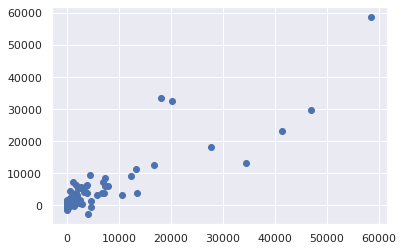

In [63]:
predictions = regressor.predict(X_test)

plt.scatter(y_test,predictions)

___
# Exploring the Output

In [64]:
# get the intercept and coef
intercept = regressor.intercept_

In [65]:
coef = regressor.coef_

In [66]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is 176.4
----------------------------------------------------------------------------------------------------
The Coefficient for Total Population is 7.5e+08
The Coefficient for Households SNAP is 0.019
The Coefficient for Estimated Individuals SNAP is 0.036
The Coefficient for Total Citizen Educated in US is 0.079
The Coefficient for Citizen Less than High School  Education is 0.014
The Coefficient for Citizen High School  Graduate is 0.063
The Coefficient for Citizen Some College  Education is -0.071
The Coefficient for Citizen College Degree is 0.039
The Coefficient for Citizen Graduate or Professional Degree is 0.034
The Coefficient for Total Citizen Income is -0.079
The Coefficient for Citizen No Income is 0.042
The Coefficient for Citizen Income 1-9999 is 0.029
The Coefficient for Citizen Income 10000-14999 is -0.3
The Coefficient for Citizen Income 15000-24999 is -0.0061
The Coefficient for Citizen Income 25000-34999 is -0.057
The Coefficient for Citiz

In [67]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Total Population,7.458616e+08
Households SNAP,1.863867e-02
Estimated Individuals SNAP,3.594346e-02
Total Citizen Educated in US,7.935572e-02
Citizen Less than High School Education,1.446434e-02
Citizen High School Graduate,6.274008e-02
Citizen Some College Education,-7.072231e-02
Citizen College Degree,3.909250e-02
Citizen Graduate or Professional Degree,3.378442e-02
Total Citizen Income,-7.926441e-02


# Evaluating the Model

In [68]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([-1.86430982e+02,  5.81416802e+01, -1.14814242e+02,  4.16721878e+03,
       -5.27624543e+02,  3.29312120e+03,  9.21963241e+03,  1.81136233e+04,
       -9.42285202e+01,  5.45184496e+02, -4.31133173e+01, -1.20908424e+02,
        2.06562958e+02,  8.46547149e+03,  3.24716918e+01,  1.08139892e+03,
       -1.79786461e+02, -6.81840177e+01, -1.86579016e+02, -5.73871389e+02,
        4.92063763e+01,  2.33781385e+01, -1.35305315e+02,  5.54537457e+01,
       -1.16314178e+01,  2.63632764e+02,  1.01168245e+02, -8.49868861e+01,
        1.92054233e+02,  6.68656215e+02,  1.31613960e+04,  6.03079133e+01,
        3.12406648e+03, -2.15343899e+02, -2.18622822e+02,  3.37572971e+02,
        5.12311892e+01,  5.79976972e+02, -9.30390891e+01,  5.88554010e+04,
       -5.38582088e+01,  2.06164896e+03, -4.51939392e+01,  8.29437422e+02,
       -1.90272246e+02,  5.14148119e+02,  3.80756366e+02, -4.65569648e+01,
        1.78795686e+02, -1.61957191e+02,  1.95903778e+02,  5.37844642e+02,
       -1.40152368e+02,  

In [69]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
1693,0,-186.430982
398,109,58.141680
939,13,-114.814242
2289,3270,4167.218775
1329,92,-527.624543
2642,1340,3293.121203
2312,12363,9219.632412
1856,27760,18113.623271
276,42,-94.228520
602,761,545.184496


In [70]:
# dont have to print 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 542.346497760278
Mean Squared Error: 3332299.317413614
Root Mean Squared Error: 1825.4586594644136


In [71]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                              OLS Regression Results                             
Dep. Variable:     Total Confirmed Cases   R-squared:                       0.897
Model:                               OLS   Adj. R-squared:                  0.896
Method:                    Least Squares   F-statistic:                     903.5
Date:                   Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                           20:16:28   Log-Likelihood:                -26542.
No. Observations:                   3139   AIC:                         5.315e+04
Df Residuals:                       3108   BIC:                         5.333e+04
Df Model:                             30                                         
Covariance Type:               nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


___
<a id = "200"> <h2> LinReg with Target Var 'Total Deaths' </h2> </a>

# Build the Model

In [72]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels

X = data[features]
y = data['Total Deaths']

In [73]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [74]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [75]:
# get the intercept and coef
intercept = regressor.intercept_

In [76]:
coef = regressor.coef_

In [77]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is -58.29
----------------------------------------------------------------------------------------------------
The Coefficient for Total Population is -2e+09
The Coefficient for Households SNAP is -0.019
The Coefficient for Estimated Individuals SNAP is 0.0087
The Coefficient for Total Citizen Educated in US is 0.0073
The Coefficient for Citizen Less than High School  Education is 0.0033
The Coefficient for Citizen High School  Graduate is 0.0057
The Coefficient for Citizen Some College  Education is -0.0059
The Coefficient for Citizen College Degree is 0.002
The Coefficient for Citizen Graduate or Professional Degree is 0.0023
The Coefficient for Total Citizen Income is -0.0062
The Coefficient for Citizen No Income is 0.005
The Coefficient for Citizen Income 1-9999 is 0.0074
The Coefficient for Citizen Income 10000-14999 is -0.031
The Coefficient for Citizen Income 15000-24999 is 0.0036
The Coefficient for Citizen Income 25000-34999 is -0.015
The Coefficient

In [78]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Total Population,-1.985793e+09
Households SNAP,-1.854730e-02
Estimated Individuals SNAP,8.650982e-03
Total Citizen Educated in US,7.310538e-03
Citizen Less than High School Education,3.266777e-03
Citizen High School Graduate,5.730194e-03
Citizen Some College Education,-5.925315e-03
Citizen College Degree,1.967767e-03
Citizen Graduate or Professional Degree,2.262412e-03
Total Citizen Income,-6.180677e-03


# Evaluating the Model

In [79]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([-1.41797693e+01, -6.79668871e-01, -1.44935080e+01,  3.09059766e+02,
       -4.80401659e+01,  2.10201889e+02,  7.19611367e+02,  7.73837754e+02,
       -3.09609322e+01,  1.04462685e+02, -2.14967886e+00, -1.39130867e+01,
        1.86720445e+01,  2.63598026e+02, -4.22209520e+00,  8.59309924e+01,
       -1.38810688e+01,  1.18976165e-01, -3.03207151e+01, -7.36144869e+01,
        1.87036433e+01,  7.06667343e+00, -2.25301866e+01, -3.22618503e+00,
       -3.83298784e+00,  2.00887190e+01,  6.72819116e-01, -7.79022401e+00,
       -2.16240471e+01,  4.94673553e+01,  7.00684075e+02,  1.87156247e+01,
        1.14377881e+02, -1.33089858e+01, -3.10108470e+01,  2.96710083e+01,
       -6.00029521e+00,  4.18523115e+01, -1.73539362e+01,  4.38544845e+03,
       -3.19995789e+00,  1.44780737e+02,  2.14513949e+01,  5.55003278e+01,
       -1.61620171e+01,  3.50348527e+01,  2.25511181e+01, -1.05966884e+01,
       -3.68405804e+01, -2.06525005e+01,  3.80919919e+00,  3.81089215e+01,
       -2.29598231e+01, -

In [80]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
1693,0,-14.179769
398,11,-0.679669
939,0,-14.493508
2289,249,309.059766
1329,10,-48.040166
2642,32,210.201889
2312,467,719.611367
1856,3038,773.837754
276,0,-30.960932
602,10,104.462685


In [81]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.28173193486566
Mean Squared Error: 42962.31056781876
Root Mean Squared Error: 207.27351632038946


In [82]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Total Deaths   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     505.9
Date:                Sat, 20 Jun 2020   Prob (F-statistic):               0.00
Time:                        20:16:40   Log-Likelihood:                -19081.
No. Observations:                3139   AIC:                         3.822e+04
Df Residuals:                    3108   BIC:                         3.841e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


___
<a id = "300"> <h2> LinReg with Target Var 'Case Rate per 1000' </h2> </a>

# Build the Model

In [83]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels


X = data[features]
y = data['Case Rate per 1000']



In [84]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [85]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [86]:
# get the intercept and coef
intercept = regressor.intercept_

In [87]:
coef = regressor.coef_

In [88]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is 6.974
----------------------------------------------------------------------------------------------------
The Coefficient for Total Population is -1.5e+08
The Coefficient for Households SNAP is 0.00073
The Coefficient for Estimated Individuals SNAP is -0.00025
The Coefficient for Total Citizen Educated in US is 3.7e-05
The Coefficient for Citizen Less than High School  Education is 0.0001
The Coefficient for Citizen High School  Graduate is 7e-05
The Coefficient for Citizen Some College  Education is -0.00012
The Coefficient for Citizen College Degree is 8.5e-06
The Coefficient for Citizen Graduate or Professional Degree is -2.1e-05
The Coefficient for Total Citizen Income is 4e-05
The Coefficient for Citizen No Income is -8.1e-06
The Coefficient for Citizen Income 1-9999 is -0.00016
The Coefficient for Citizen Income 10000-14999 is 0.00011
The Coefficient for Citizen Income 15000-24999 is -0.00046
The Coefficient for Citizen Income 25000-34999 is 0.0004


In [89]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Total Population,-1.491047e+08
Households SNAP,7.299483e-04
Estimated Individuals SNAP,-2.542590e-04
Total Citizen Educated in US,3.747255e-05
Citizen Less than High School Education,1.007470e-04
Citizen High School Graduate,7.047883e-05
Citizen Some College Education,-1.222316e-04
Citizen College Degree,8.526412e-06
Citizen Graduate or Professional Degree,-2.064700e-05
Total Citizen Income,4.033984e-05


# Evaluating the Model

In [90]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([-2.33286526e-01,  5.95522873e+00,  1.09359096e+00,  7.34266585e+00,
        1.90037414e+00,  7.14615603e+00,  9.76839652e+00,  3.08595225e+01,
        3.65197320e+00,  1.69305308e+00,  3.36690937e+00,  8.76200105e-01,
        3.10727862e+00,  1.06636364e+01,  5.51595227e+00,  6.93013574e+00,
       -1.04208236e+00,  1.12690562e+00,  5.39025457e+00,  2.50524282e+00,
        1.87721127e+00,  3.19738992e+00,  4.30320163e+00,  5.98180250e+00,
        2.02408308e+00,  5.28945566e+00,  4.14553138e+00,  2.09741318e+00,
        2.95644862e+00,  4.05436952e+00,  1.86811954e+01,  4.47671523e+00,
        6.80402931e+00,  2.50418388e+00,  3.39459799e+00,  3.57708479e+00,
        3.55786664e+00,  5.60662550e+00,  5.19305241e+00,  4.90354653e+01,
        5.90871872e+00,  4.92353302e+00,  3.09541501e+00,  6.16632307e+00,
        4.41140972e+00,  2.62540586e+00,  2.26034609e+00,  3.30674210e+00,
        3.48826084e+00,  3.04548472e+00,  7.05271353e+00,  5.25820640e+00,
        3.88599557e+00,  

In [91]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
1693,0.000,-0.233287
398,6.711,5.955229
939,1.346,1.093591
2289,10.983,7.342666
1329,1.472,1.900374
2642,5.312,7.146156
2312,19.728,9.768397
1856,17.505,30.859522
276,5.746,3.651973
602,3.785,1.693053


In [92]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.204742340954206
Mean Squared Error: 35.545553312292434
Root Mean Squared Error: 5.962009167410969


In [93]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:     Case Rate per 1000   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     16.40
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           3.30e-78
Time:                        20:16:42   Log-Likelihood:                -10473.
No. Observations:                3139   AIC:                         2.101e+04
Df Residuals:                    3108   BIC:                         2.120e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


___
<a id = "400"> <h2> LinReg with Target Var 'Death Rate 1000' </h2> </a>

# Build the Model

In [94]:
# divide the dataset into attributes and lables 
# x variable contains all the attributes/features-- took out Age bc float type
# y varaible contains labels

X = data[features]
y = data['Death Rate 1000']

In [95]:
# splait data set 
# split 80% of the data to the training set while 20% of the data to test set using below code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2019)

In [96]:
# train our model
regressor = LinearRegression() 

# fit the model
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

___
# Exploring the Output

In [97]:
# get the intercept and coef
intercept = regressor.intercept_

In [98]:
coef = regressor.coef_

In [99]:
# print the intercept of the model
print('The intercept of our model is {:.4}'.format(intercept))
print('-'*100)

# loop through the dict and print the coef for each variable
for cf in zip(X.columns, coef):
    print('The Coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept of our model is -0.01415
----------------------------------------------------------------------------------------------------
The Coefficient for Total Population is -5.4e+06
The Coefficient for Households SNAP is 1.7e-05
The Coefficient for Estimated Individuals SNAP is -7e-06
The Coefficient for Total Citizen Educated in US is -1.8e-06
The Coefficient for Citizen Less than High School  Education is 3.5e-06
The Coefficient for Citizen High School  Graduate is 9.7e-06
The Coefficient for Citizen Some College  Education is -1e-05
The Coefficient for Citizen College Degree is 3.8e-07
The Coefficient for Citizen Graduate or Professional Degree is -5e-06
The Coefficient for Total Citizen Income is 7.1e-06
The Coefficient for Citizen No Income is -1.6e-06
The Coefficient for Citizen Income 1-9999 is -3.9e-06
The Coefficient for Citizen Income 10000-14999 is -1.9e-06
The Coefficient for Citizen Income 15000-24999 is -1.3e-05
The Coefficient for Citizen Income 25000-34999 is -1.

In [100]:
# mutlivariable lin reg, reg model will show the most optimal coefficients for all attributes 
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Total Population,-5.435831e+06
Households SNAP,1.681549e-05
Estimated Individuals SNAP,-7.044839e-06
Total Citizen Educated in US,-1.771061e-06
Citizen Less than High School Education,3.458678e-06
Citizen High School Graduate,9.662791e-06
Citizen Some College Education,-1.027297e-05
Citizen College Degree,3.811393e-07
Citizen Graduate or Professional Degree,-5.025728e-06
Total Citizen Income,7.059343e-06


# Evaluating the Model

In [101]:
# predicition on the test data
y_pred = regressor.predict(X_test)
y_pred

array([-2.51281290e-02,  1.86990252e-01,  6.57475145e-03,  5.09315230e-01,
        4.97867517e-02,  2.99110361e-01,  7.70012976e-01,  1.67695233e+00,
        4.69617915e-02,  1.08376802e-01,  2.44385318e-01,  1.72930857e-02,
        9.15199530e-02,  4.40148662e-01,  1.91208978e-01,  2.80232426e-01,
       -3.61026536e-02,  4.91727084e-02,  1.43870329e-01,  1.53749274e-04,
        8.03766112e-02,  1.37075006e-01,  9.75531302e-02,  2.04217944e-01,
        7.78745414e-02,  2.79851548e-01,  1.09398946e-01,  1.09827847e-01,
        7.50247427e-03,  1.61146231e-01,  1.05373061e+00,  2.01295203e-01,
        1.70944366e-01,  9.11292527e-02,  9.29118802e-02,  1.32572351e-01,
       -8.89033689e-02,  1.90015942e-01,  2.10066087e-01,  3.14277181e+00,
        2.04491473e-01,  2.28884488e-01,  1.40700906e-01,  1.94442794e-01,
        1.20690623e-01,  9.25898584e-02,  6.72733172e-02,  1.05653956e-01,
        8.66505810e-02,  9.45180715e-02,  2.39414417e-01,  1.88916840e-01,
        1.24961798e-01,  

In [102]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

df1

,Actual,Predicted
1693,0.000,-0.025128
398,0.677,0.186990
939,0.000,0.006575
2289,0.836,0.509315
1329,0.160,0.049787
2642,0.127,0.299110
2312,0.745,0.770013
1856,1.916,1.676952
276,0.000,0.046962
602,0.050,0.108377


In [103]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16570503510991189
Mean Squared Error: 0.09474492983408452
Root Mean Squared Error: 0.3078066435834102


In [104]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        Death Rate 1000   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     39.70
Date:                Sat, 20 Jun 2020   Prob (F-statistic):          1.10e-193
Time:                        20:16:46   Log-Likelihood:                -301.15
No. Observations:                3139   AIC:                             664.3
Df Residuals:                    3108   BIC:                             851.9
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

/opt/tljh/user/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


___
<a id = "500"> <h2> Evaluating Results </h2> </a>